<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Connor_Heraty_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the data as a pandas data frame and adding informative names to the features**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman.data


In [0]:
# Inputting column names 

df_surv = pd.read_csv('haberman.data',header=None, names = ['patient_age', 'operation_yr', 'ax_nod_det', 'surv_sta'])

# 'surv_sta' column indicates whether a patient has survived with 1 corresponding to survival and 2 corresponding to death

In order to make more informative and useful visualizations, I decided to remove outliers from the Number of positive axillary nodes detected column

In [0]:
# In order to make more informative and useful visualizations, I decided to remove outliers from the number of positive axillary nodes detected column
from scipy import stats

df_clean = pd.DataFrame(df_surv)
df_clean['ax_nod_det'] = df_clean['ax_nod_det'][(np.abs(stats.zscore(df_clean)) < 2).all(axis=1)]

In [54]:
df_surv.head(10) # Our dataset 

,patient_age,operation_yr,ax_nod_det,surv_sta
0,30,64,NaN,1
1,30,62,NaN,1
2,30,65,NaN,1
3,31,59,2.0,1
4,31,65,4.0,1
5,33,58,10.0,1
6,33,60,0.0,1
7,34,59,0.0,2
8,34,66,9.0,2
9,34,58,NaN,1


I have replaced our outlier values with the ax_nod_det's median value:

In [0]:
df_clean['ax_nod_det'] = df_clean['ax_nod_det'].fillna(df_clean['ax_nod_det'].median())

**Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).**

In [56]:
df_clean.info()

# The dataset description indicates 306 total instances. All of our data has been loaded!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age     306 non-null int64
operation_yr    306 non-null int64
ax_nod_det      306 non-null float64
surv_sta        306 non-null int64
dtypes: float64(1), int64(3)
memory usage: 9.6 KB


In [57]:
df_clean.describe()

,patient_age,operation_yr,ax_nod_det,surv_sta
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,2.467320,1.264706
std,10.803452,3.249405,3.871787,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,3.000000,2.000000
max,83.000000,69.000000,18.000000,2.000000


**Validate that you have no missing values.**

In [58]:
df_clean.isnull().sum()

patient_age     0
operation_yr    0
ax_nod_det      0
surv_sta        0
dtype: int64

**Replacing the survival status 1 and 2 convention to 0 and 1**

In [0]:
df_clean['surv_sta'] = df_surv['surv_sta'].replace(to_replace = [1,2], value = [0,1])

In [60]:
df_clean.head(5)

,patient_age,operation_yr,ax_nod_det,surv_sta
0,30,64,1.0,0
1,30,62,1.0,0
2,30,65,1.0,0
3,31,59,2.0,0
4,31,65,4.0,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Placed the age and axillary node columns into buckets for our visualizations
age_bin = pd.cut(df_clean['patient_age'],5)
ax_bin = pd.cut(df_clean['ax_nod_det'], 6)

In [0]:
# Created various crosstables that I believe will be useful for our analysis
ag_surv_ct = pd.crosstab(age_bin, df_clean['surv_sta'])
ax_bin_ct = pd.crosstab(ax_bin, df_clean['surv_sta'])
op_year_ct = pd.crosstab(df_clean['operation_yr'], df_clean['surv_sta'])
age_node_ct = pd.crosstab(age_bin, ax_bin)

**Figure 1**

Here we will look for any trends that show a relationship between survival rate and age. View my answers to **Part 3** for analysis.

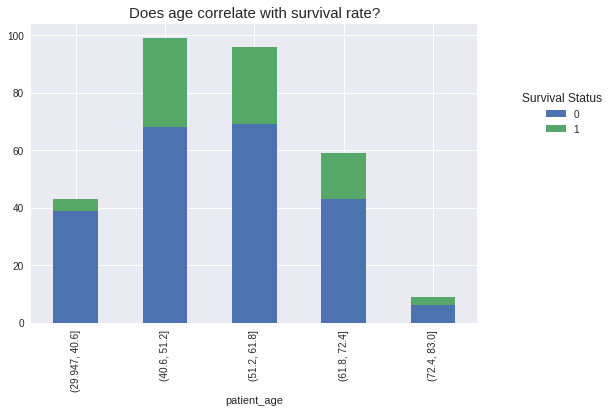

In [63]:
ax = ag_surv_ct.plot(kind='bar',stacked=True)
ax.legend(title='Survival Status',loc='upper right', bbox_to_anchor=(1.3,.8))
plt.title('Does age correlate with survival rate?', size=15)

plt.show()

**Figure 2**

Here we will look for any trends that show a relationship between survival rate and axillary nodes detected. View my answers to **Part 3** for analysis.

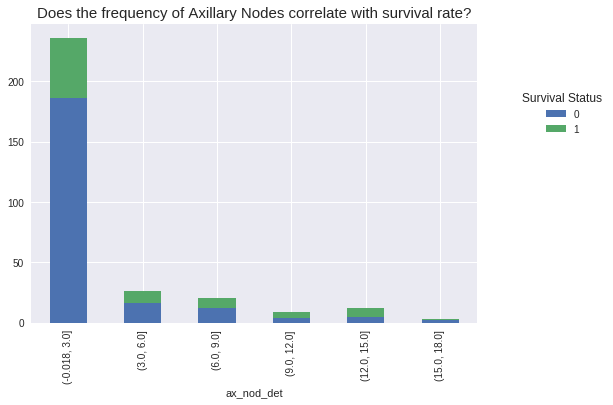

In [64]:
ax = ax_bin_ct.plot(kind='bar',stacked=True)
ax.legend(title='Survival Status',loc='upper right', bbox_to_anchor=(1.3,.8))
plt.title('Does the frequency of Axillary Nodes correlate with survival rate?', size=15)

plt.show()

**Figure 3**

In [65]:
ax_bin_ct

surv_sta,0,1
ax_nod_det,,
"(-0.018, 3.0]",186,50
"(3.0, 6.0]",16,10
"(6.0, 9.0]",12,8
"(9.0, 12.0]",4,5
"(12.0, 15.0]",5,7
"(15.0, 18.0]",2,1


**Figure 4**

Here we will look for any trends that show a relationship between age and axillary nodes detected. View my answers to **Part 3** for analysis.

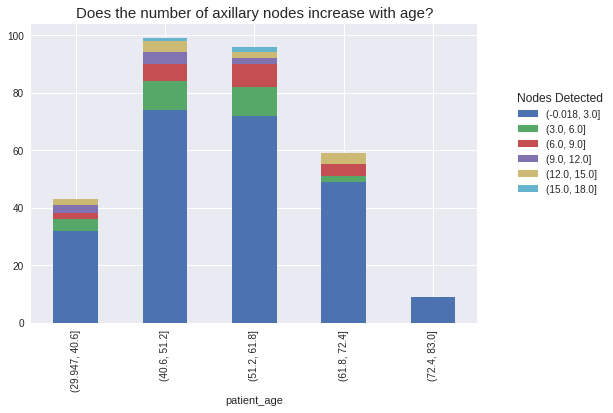

In [66]:
ax = age_node_ct.plot(kind='bar',stacked=True)
ax.legend(title='Nodes Detected',loc='upper right', bbox_to_anchor=(1.3,.8))
plt.title('Does the number of axillary nodes increase with age?', size=15)

plt.show()

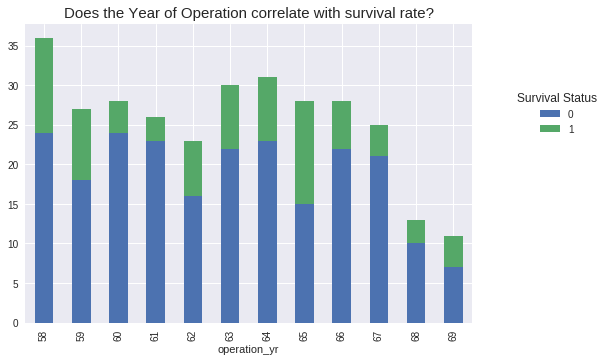

In [67]:
# There does not appear to be a relationship here.
ax = op_year_ct.plot(kind='bar',stacked=True)
ax.legend(title='Survival Status',loc='upper right', bbox_to_anchor=(1.3,.8))
plt.title('Does the Year of Operation correlate with survival rate?', size=15)

plt.show()

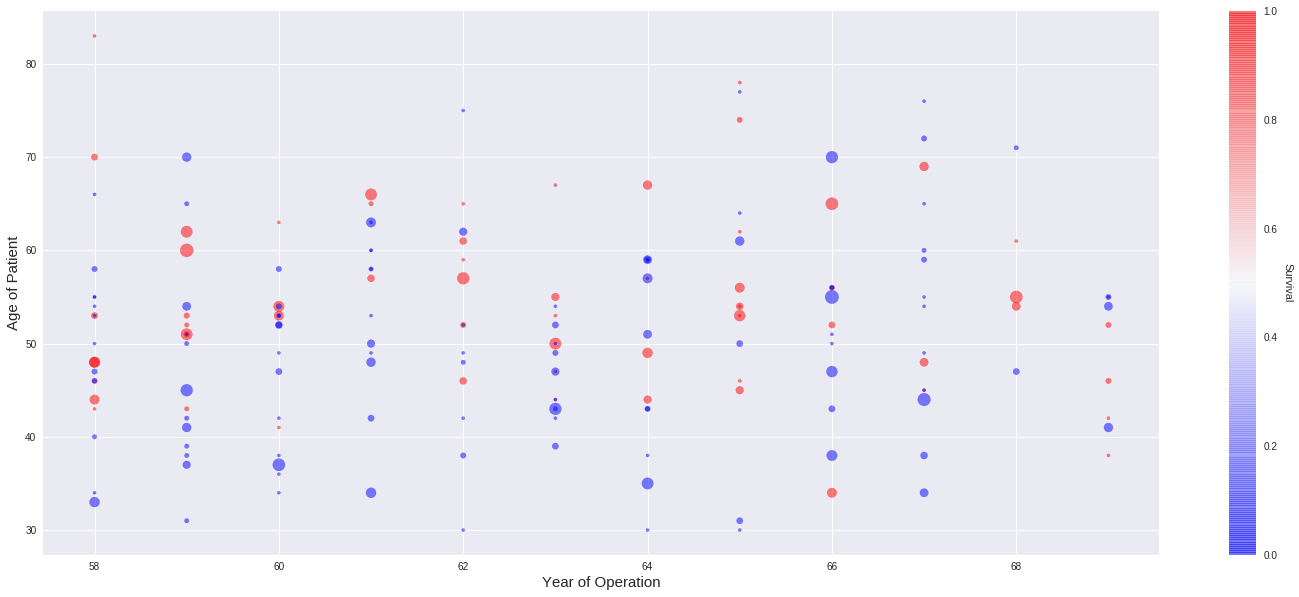

In [68]:
# Scatter plot including all 4 variables into one graph.

# Increase figure size 
plt.figure(figsize=(25,10))

# Scatter Plot
s = df_clean['ax_nod_det']
ax = plt.scatter(df_clean['operation_yr'],df_clean['patient_age'],c=df_clean['surv_sta'], s=(s*10),cmap='bwr', alpha=.5)

# Labeling
plt.xlabel('Year of Operation', size=15)
plt.ylabel('Age of Patient', size=15)

# Colorbar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Survival', rotation=270)

plt.show()


In [0]:
age_node_surv_ct = pd.crosstab([age_bin, ax_bin], df_surv['surv_sta'])

In [70]:
# Crosstable including all variables that have a relationship to the survival rate.
age_node_surv_ct

surv_sta                       0   1
patient_age    ax_nod_det           
(29.947, 40.6] (-0.018, 3.0]  29   3
               (3.0, 6.0]      4   0
               (6.0, 9.0]      1   1
               (9.0, 12.0]     3   0
               (12.0, 15.0]    2   0
               (15.0, 18.0]    0   0
(40.6, 51.2]   (-0.018, 3.0]  53  21
               (3.0, 6.0]      7   3
               (6.0, 9.0]      4   2
               (9.0, 12.0]     1   3
               (12.0, 15.0]    2   2
               (15.0, 18.0]    1   0
(51.2, 61.8]   (-0.018, 3.0]  59  13
               (3.0, 6.0]      4   6
               (6.0, 9.0]      5   3
               (9.0, 12.0]     0   2
               (12.0, 15.0]    0   2
               (15.0, 18.0]    1   1
(61.8, 72.4]   (-0.018, 3.0]  39  10
               (3.0, 6.0]      1   1
               (6.0, 9.0]      2   2
               (9.0, 12.0]     0   0
               (12.0, 15.0]    1   3
               (15.0, 18.0]    0   0
(72.4, 83.0]   (-0.018, 3.0]   6   3
               (3.0, 6.0]      0   0
               (6.0, 9.0]      0   0
               (9.0, 12.0]     0   0
               (12.0, 15.0]    0   0
               (15.0, 18.0]    0   0

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. Age - The feature that I found that appeared to have a significant positive relationship with survival was being under the age of 40. If you examine **Figure 1**, the data reveals a large increase in the percentage of deaths after the age of 40. All the remaining age buckets share a relatively consistent survival/death ratio. We can conclude that this finding is signficant.

2. Number of axillary nodes - The data indicates that once you have greater than three axillary nodes, your survival rate drops by ~25%. If you examine **Figure 2** & **Figure 3**, you will notice the survival rate does drop significantly with higher axillary node counts. 

3. After examination of **Figure 4**, one can see that the proportion of individuals with greater than 3 axillary nodes increases after the age of 40. This seems to indicate that after the age of 40 your body has a higher likelihood of contracting higher quantities of axillary nodes as well as a decreased ability to survive the operation to remove said nodes. 

  **This finding may indicate that age has the highest correlation with breast cancer survival and that the quantity of nodes may be a confounding variable. **